In [1]:
data <- read.csv("new_chr19_static_classified.csv")
head(data,10)
tail(data,10)

X,binID,start,cata,aRead,bRead,aNorm,bNorm
70654,chr19_3079000,3078900,3,72,119,69.230769,69.186047
32181,chr19_3079000,3078900,2,27,48,25.961538,27.906977
1,chr19_3079000,3078900,1,5,5,4.807692,2.906977
70655,chr19_3079600,3079500,3,58,72,79.452055,67.289720
32182,chr19_3079600,3079500,2,10,19,13.698630,17.757009
2,chr19_3079600,3079500,1,5,16,6.849315,14.953271
70656,chr19_3079800,3079700,3,77,108,53.472222,61.714286
32183,chr19_3079800,3079700,2,62,60,43.055555,34.285714
3,chr19_3079800,3079700,1,5,7,3.472222,4.000000
70657,chr19_3083900,3083800,3,6,8,100.000000,100.000000


,X,binID,start,cata,aRead,bRead,aNorm,bNorm
110058,32179,chr19_61313800,61313700,1,21,54,46.666667,62.790698
110059,110064,chr19_61316600,61316500,3,39,56,75.000000,77.777778
110060,70650,chr19_61316600,61316500,2,13,16,25.000000,22.222222
110061,110065,chr19_61316700,61316600,3,108,196,92.307692,92.018779
110062,70651,chr19_61316700,61316600,2,9,17,7.692308,7.981221
110063,110066,chr19_61324200,61324100,3,79,161,76.699029,77.403846
110064,70652,chr19_61324200,61324100,2,24,47,23.300971,22.596154
110065,110067,chr19_61330000,61329900,3,40,37,64.516129,54.411765
110066,70653,chr19_61330000,61329900,2,17,25,27.419355,36.764706
110067,32180,chr19_61330000,61329900,1,5,6,8.064516,8.823529


In [2]:
high_sub <- data[data$cata == 3, c("binID", "start", "aRead")]
names(high_sub) <- c("binID", "start", "high")
# head(high_sub)
medium_sub <- data[data$cata == 2, c("binID", "start", "aRead")]
names(medium_sub) <- c("binID", "start", "medium")
# head(medium_sub)
low_sub <- data[data$cata == 1, c("binID", "start", "aRead")]
names(low_sub) <- c("binID", "start", "low")
# head(low_sub)

# merge
clusterdf <- merge(high_sub, medium_sub, all = TRUE)
clusterdf <- merge(clusterdf, low_sub, all = TRUE)
clusterdf <- clusterdf[order(as.numeric(clusterdf$start)),]
clusterdf[is.na(clusterdf)] <- 0
head(clusterdf,10)

,binID,start,high,medium,low
13719,chr19_3079000,3078900,72,27,5
13722,chr19_3079600,3079500,58,10,5
13725,chr19_3079800,3079700,77,62,5
13746,chr19_3083900,3083800,6,0,0
13751,chr19_3084300,3084200,17,19,47
13759,chr19_3085800,3085700,16,18,0
13770,chr19_3087800,3087700,10,0,0
13814,chr19_3094600,3094500,127,27,7
13815,chr19_3095100,3095000,9,0,0
13818,chr19_3095300,3095200,36,16,1


In [38]:
paste("Total number of Bins:", nrow(clusterdf))

[1] "Total number of Bins: 41135"

In [3]:
# write.csv(clusterdf, "A_clusterdf_count.csv")

In [4]:
dist_tolerance <- 100
# meth_tolerance <- 40 
# cor_2_cutoff <- 0.9
alpha <- 0.05

In [45]:
pre.row <- clusterdf[1,]

dist.fun <- function(row) {
    dist <- as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"]))
    pre.row <<- row
    return(c(row["binID"], row["start"], row["high"], row["medium"], row["low"], dist = dist)) 
}

dist.result <- t(apply(clusterdf, 1, dist.fun))
dist.result <- as.data.frame(dist.result)
head(dist.result, 30)

,binID,start,high,medium,low,dist
13719,chr19_3079000,3078900,72,27,5,0
13722,chr19_3079600,3079500,58,10,5,600
13725,chr19_3079800,3079700,77,62,5,200
13746,chr19_3083900,3083800,6,0,0,4100
13751,chr19_3084300,3084200,17,19,47,400
13759,chr19_3085800,3085700,16,18,0,1500
13770,chr19_3087800,3087700,10,0,0,2000
13814,chr19_3094600,3094500,127,27,7,6800
13815,chr19_3095100,3095000,9,0,0,500
13818,chr19_3095300,3095200,36,16,1,200


In [46]:
dist.result <- dist.result[as.numeric(as.character(dist.result$dist)) <= dist_tolerance, ]
head(dist.result)

dist.result <- dist.result[-1,]
head(dist.result)
nrow(dist.result)

,binID,start,high,medium,low,dist
13719,chr19_3079000,3078900,72,27,5,0
14026,chr19_3119900,3119800,74,22,6,100
14203,chr19_3149900,3149800,30,0,0,100
14205,chr19_3150000,3149900,43,4,0,100
14725,chr19_3224000,3223900,0,0,16,100
14770,chr19_3228500,3228400,3,3,7,100


,binID,start,high,medium,low,dist
14026,chr19_3119900,3119800,74,22,6,100
14203,chr19_3149900,3149800,30,0,0,100
14205,chr19_3150000,3149900,43,4,0,100
14725,chr19_3224000,3223900,0,0,16,100
14770,chr19_3228500,3228400,3,3,7,100
14933,chr19_3246300,3246200,15,2,0,100


[1] 5869

In [70]:
start.pos <- dist.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]  3119700  3119800  3149700  3149800  3149900  3223800  3223900  3228300
    [9]  3228400  3246100  3246200  3247100  3247200  3247700  3247800  3249000
   [17]  3249100  3249200  3249300  3268700  3268800  3269800  3269900  3273300
   [25]  3273400  3274300  3274400  3274500  3280300  3280400  3284000  3284100
   [33]  3286900  3287000  3287400  3287500  3314700  3314800  3317000  3317100
   [41]  3322700  3322800  3325000  3325100  3325200  3326500  3326600  3329100
   [49]  3329200  3352600  3352700  3355900  3356000  3369000  3369100  3400300
   [57]  3400400  3412300  3412400  3429600  3429700  3431000  3431100  3442200
   [65]  3442300  3444100  3444200  3454600  3454700  3460400  3460500  3464500
   [73]  3464600  3470900  3471000  3479600  3479700  3481900  3482000  3482600
   [81]  3482700  3487000  3487100  3522700  3522800  3522900  3527100  3527200
   [89]  3533200  3533300  3539000  3539100  3580700  3580800  3580900  3581000
   [97]  3587700  3587800  3591000  3591100  3610100  3610200  3611900  3612000
  [105]  3612100  3612200  3615700  3615800  3617700  3617800  3622500  3622600
  [113]  3622700  3627200  3627300  3630900  3631000  3631200  3631300  3643700
  [121]  3643800  3643900  3646600  3646700  3649000  3649100  3649200  3649300
  [129]  3650900  3651000  3652100  3652200  3658800  3658900  3659400  3659500
  [137]  3667900  3668000  3669100  3669200  3670400  3670500  3670600  3679000
  [145]  3679100  3699000  3699100  3715500  3715600  3727500  3727600  3737200
  [153]  3737300  3769700  3769800  3783300  3783400  3806700  3806800  3809000
  [161]  3809100  3809200  3818200  3818300  3821700  3821800  3821900  3822200
  [169]  3822300  3823900  3824000  3824200  3824300  3837000  3837100  3838100
  [177]  3838200  3844400  3844500  3845500  3845600  3901900  3902000  3910000
  [185]  3910100  3918700  3918800  3930700  3930800  3936200  3936300  3942900
  [193]  3943000  3943400  3943500  3943600  3965700  3965800  3965900  3979500
  [201]  3979600  3987100  3987200  3988600  3988700  3993700  3993800  4003500
  [209]  4003600  4003700  4003800  4003900  4004000  4004100  4009800  4009900
  [217]  4013100  4013200  4268800  4268900  4269000  4281900  4282000  4283500
  [225]  4283600  4287000  4287100  4298900  4299000  4306700  4306800  4306900
  [233]  4309300  4309400  4313400  4313500  4320100  4320200  4343000  4343100
  [241]  4395800  4395900  4398500  4398600  4426100  4426200  4472100  4472200
  [249]  4510000  4510100  4528800  4528900  4529800  4529900  4565100  4565200
  [257]  4578300  4578400  4580600  4580700  4581600  4581700  4581800  4585200
  [265]  4585300  4602900  4603000  4603100  4604300  4604400  4604500  4609900
  [273]  4610000  4610100  4613300  4613400  4614300  4614400  4623700  4623800
  [281]  4623900  4626500  4626600  4632200  4632300  4632400  4632500  4645600
  [289]  4645700  4655100  4655200  4664700  4664800  4700700  4700800  4712600
  [297]  4712700  4720300  4720400  4720500  4720600  4733500  4733600  4734200
  [305]  4734300  4734400  4734500  4742300  4742400  4747300  4747400  4761900
  [313]  4762000  4762500  4762600  4782600  4782700  4787700  4787800  4792600
  [321]  4792700  4802600  4802700  4802800  4803500  4803600  4818700  4818800
  [329]  4818900  4820000  4820100  4825400  4825500  4825600  4837200  4837300
  [337]  4839700  4839800  4848900  4849000  4855200  4855300  4856500  4856600
  [345]  4856700  4860400  4860500  4867600  4867700  4878300  4878400  4878500
  [353]  4883500  4883600  4889800  4889900  4890000  4890100  4894300  4894400
  [361]  4896500  4896600  4905100  4905200  4914500  4914600  4915700  4915800
  [369]  4916400  4916500  4916600  4921400  4921500  4927300  4927400  4932600
  [377]  4932700  4938000  4938100  4945200  4945300  4962100  4962200  4962400
  [385]  4962500  4967400  4967500  4967600  4967900  4968000  4983700  4983800
  [393]  4988300  4988400  4988500  4995500  4995600  5025500  5025600  5026300
  [4

In [71]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
dist.result <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
14025,chr19_3119800,3119700,138,23,8
14026,chr19_3119900,3119800,74,22,6
14202,chr19_3149800,3149700,150,11,6
14203,chr19_3149900,3149800,30,0,0
14205,chr19_3150000,3149900,43,4,0
14724,chr19_3223900,3223800,0,0,13
14725,chr19_3224000,3223900,0,0,16
14769,chr19_3228400,3228300,4,6,19
14770,chr19_3228500,3228400,3,3,7
14931,chr19_3246200,3246100,10,0,0


In [74]:
pre.row <- dist.result[1,]

test.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = "0"))
    } else {
        test.matrix <- cbind(c(as.numeric(as.character(pre.row["high"])),
                               as.numeric(as.character(pre.row["medium"])),
                               as.numeric(as.character(pre.row["low"]))),
                             c(as.numeric(as.character(row["high"])), 
                               as.numeric(as.character(row["medium"])),
                               as.numeric(as.character(row["low"]))))
        test.matrix <- test.matrix[rowSums(test.matrix) > 0, ]
        value <- suppressWarnings(chisq.test(test.matrix)$p.value)
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = as.character(value)))
    }
}

test.result <- apply(dist.result[-1,], MARGIN = 1, FUN = test.fun)
test.result <- t(test.result)
test.result <- as.data.frame(test.result)
head(test.result)

,binID,start,p.value
14026,chr19_3119900,3119800,0.195577267676745
14202,chr19_3149800,3149700,0
14203,chr19_3149900,3149800,0.188029261002941
14205,chr19_3150000,3149900,0.265040629709166
14724,chr19_3223900,3223800,0
14725,chr19_3224000,3223900,0.5774686624273


In [75]:
good.result <- test.result[as.numeric(as.character(test.result$p.value)) > alpha,]
head(good.result)

,binID,start,p.value
14026,chr19_3119900,3119800,0.195577267676745
14203,chr19_3149900,3149800,0.188029261002941
14205,chr19_3150000,3149900,0.265040629709166
14725,chr19_3224000,3223900,0.5774686624273
14770,chr19_3228500,3228400,0.709789248372606
14933,chr19_3246300,3246200,0.71411048232887


In [76]:
start.pos <- good.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]  3119700  3119800  3149700  3149800  3149900  3223800  3223900  3228300
   [9]  3228400  3246100  3246200  3247100  3247200  3247700  3247800  3273300
  [17]  3273400  3284000  3284100  3287400  3287500  3314700  3314800  3322700
  [25]  3322800  3325100  3325200  3400300  3400400  3412300  3412400  3460400
  [33]  3460500  3470900  3471000  3482600  3482700  3487000  3487100  3522800
  [41]  3522900  3527100  3527200  3533200  3533300  3610100  3610200  3622500
  [49]  3622600  3622700  3630900  3631000  3649000  3649100  3652100  3652200
  [57]  3659400  3659500  3667900  3668000  3670500  3670600  3679000  3679100
  [65]  3715500  3715600  3727500  3727600  3737200  3737300  3783300  3783400
  [73]  3806700  3806800  3809000  3809100  3809200  3818200  3818300  3821800
  [81]  3821900  3823900  3824000  3824200  3824300  3845500  3845600  3988600
  [89]  3988700  3993700  3993800  4003900  4004000  4268800  4268900  4269000
  [97]  4283500  4283600  4287000  4287100  4313400  4313500  4320100  4320200
 [105]  4395800  4395900  4398500  4398600  4426100  4426200  4529800  4529900
 [113]  4580600  4580700  4581600  4581700  4585200  4585300  4602900  4603000
 [121]  4604400  4604500  4613300  4613400  4632400  4632500  4720300  4720400
 [129]  4720500  4720600  4734200  4734300  4747300  4747400  4792600  4792700
 [137]  4818700  4818800  4818900  4820000  4820100  4839700  4839800  4878300
 [145]  4878400  4878500  4883500  4883600  4889800  4889900  4896500  4896600
 [153]  4905100  4905200  4914500  4914600  4915700  4915800  4921400  4921500
 [161]  4932600  4932700  4945200  4945300  4962400  4962500  4967500  4967600
 [169]  4988400  4988500  5026300  5026400  5031400  5031500  5039500  5039600
 [177]  5039700  5130900  5131000  5165700  5165800  5184900  5185000  5204700
 [185]  5204800  5234400  5234500  5247200  5247300  5265700  5265800  5295100
 [193]  5295200  5306800  5306900  5316300  5316400  5316500  5316800  5316900
 [201]  5317000  5317500  5317600  5336000  5336100  5370300  5370400  5381100
 [209]  5381200  5430900  5431000  5433700  5433800  5436000  5436100  5446800
 [217]  5446900  5456500  5456600  5491400  5491500  5496200  5496300  5498400
 [225]  5498500  5498600  5527400  5527500  5539700  5539800  5540400  5540500
 [233]  5549800  5549900  5551300  5551400  5570400  5570500  5643800  5643900
 [241]  5654300  5654400  5655500  5655600  5660700  5660800  5663700  5663800
 [249]  5670200  5670300  5673200  5673300  5697300  5697400  5760700  5760800
 [257]  5803100  5803200  5803800  5803900  5830100  5830200  5844800  5844900
 [265]  5846200  5846300  5853000  5853100  5880100  5880200  5900400  5900500
 [273]  5925400  5925500  5963700  5963800  5967800  5967900  5971400  5971500
 [281]  5984200  5984300  6008700  6008800  6014200  6014300  6016200  6016300
 [289]  6029800  6029900  6070700  6070800  6076700  6076800  6081300  6081400
 [297]  6087000  6087100  6088500  6088600  6115400  6115500  6123500  6123600
 [305]  6131100  6131200  6162200  6162300  6816300  6816400  6831300  6831400
 [313]  6922500  6922600  6945200  6945300  6980700  6980800  6994100  6994200
 [321]  7014800  7014900  7032100  7032200  7040600  7040700  7057500  7057600
 [329]  7278000  7278100  7290700  7290800  7398700  7398800  7421400  7421500
 [337]  7464800  7464900  7533200  7533300  7637400  7637500  7658500  7658600
 [345]  7671800  7671900  7680700  7680800  7774200  7774300  7777600  7777700
 [353]  7824000  7824100  7837000  7837100  7837200  7838600  7838700  7875400
 [361]  7875500  7993200  7993300  8010600  8010700  8036900  8037000  8039800
 [369]  8039900  8058000  8058100  8118600  8118700  8134900  8135000  8245500
 [377]  8245600  8247600  8247700  8249700  8249800  8256800  8256900  8282700
 [385]  8282800  8289400  8289500  8298400  8298500  8301400  8301500  8313500
 [393]  8313600  8313700  8318200  8318300  8324600  8324700  8407700  8407800
 [401]  8412800  8412900  8439000  8439100  8512800  

In [77]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
grouping <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
14025,chr19_3119800,3119700,138,23,8
14026,chr19_3119900,3119800,74,22,6
14202,chr19_3149800,3149700,150,11,6
14203,chr19_3149900,3149800,30,0,0
14205,chr19_3150000,3149900,43,4,0
14724,chr19_3223900,3223800,0,0,13
14725,chr19_3224000,3223900,0,0,16
14769,chr19_3228400,3228300,4,6,19
14770,chr19_3228500,3228400,3,3,7
14931,chr19_3246200,3246100,10,0,0


In [78]:
library(ggplot2)

In [79]:
pre.row <- grouping[1,]

part <- data.frame()
part <- rbind(part, pre.row)

counter = 1
sep.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        part <<- rbind(part, data.frame(binID = c(paste("gap", counter)), 
                                        start = c(0), high = c(100), medium = c(100), low = c(100)))
        counter <<- counter + 1
    }
    part <<- rbind(part, row)
    pre.row <<- row
}

invisible(apply(grouping[-1,], 1, sep.fun))

In [80]:
part[20:60,]

,binID,start,high,medium,low
20,chr19_3247800,3247700,17,6,0
21,chr19_3247900,3247800,74,12,4
110,gap 7,0,100,100,100
23,chr19_3273400,3273300,116,28,1
24,chr19_3273500,3273400,146,38,0
112,gap 8,0,100,100,100
26,chr19_3284100,3284000,245,69,9
27,chr19_3284200,3284100,171,59,10
113,gap 9,0,100,100,100
29,chr19_3287500,3287400,105,26,0


In [81]:
head(part)
tail(part)

,binID,start,high,medium,low
14025,chr19_3119800,3119700,138,23,8
2,chr19_3119900,3119800,74,22,6
1,gap 1,0,100,100,100
4,chr19_3149800,3149700,150,11,6
5,chr19_3149900,3149800,30,0,0
6,chr19_3150000,3149900,43,4,0


,binID,start,high,medium,low
12597,gap 2130,0,100,100,100
6639,chr19_61302200,61302100,21,0,0
6640,chr19_61302300,61302200,11,0,0
12598,gap 2131,0,100,100,100
6642,chr19_61311200,61311100,138,34,4
6643,chr19_61311300,61311200,179,36,1


[1] "Total Number of groups: 2132"

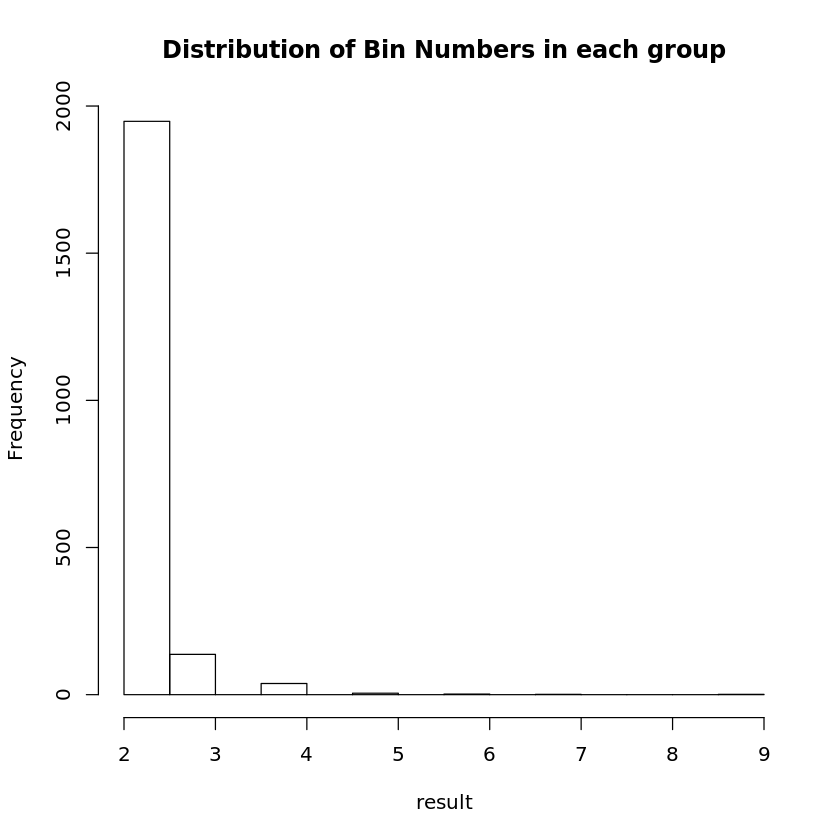

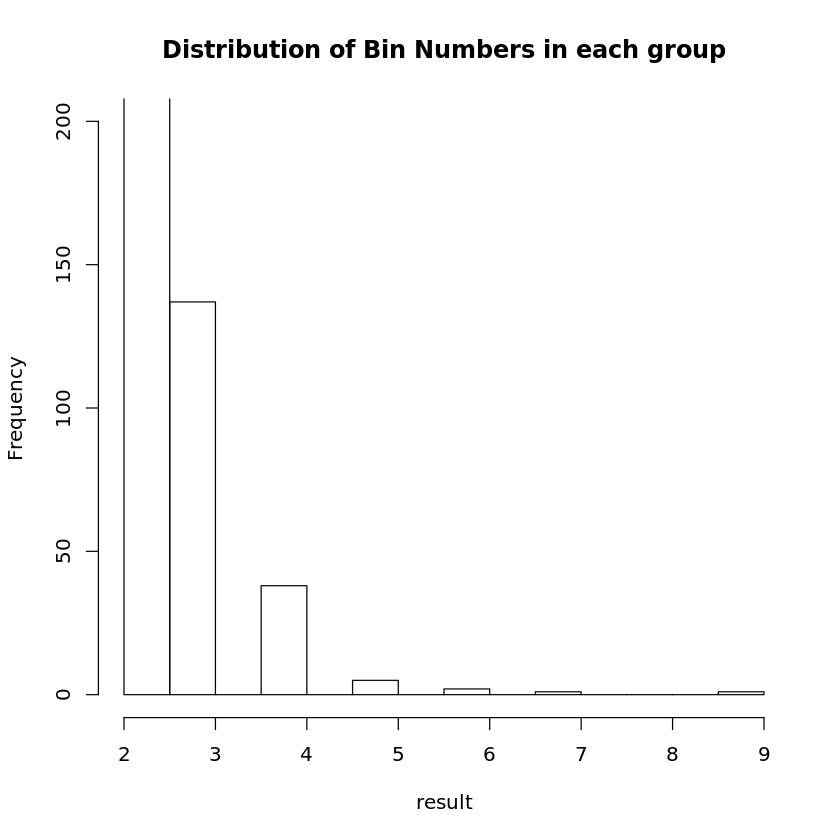

In [82]:
count = 0
result = c()
for (row in 1:nrow(part)) {
    if (substr(as.character(part[row, "binID"]), 1, 3) != "gap") {
        count = count + 1
    } else {
        result = c(result, count)
        count = 0
    }
}

result = c(result, count)

paste("Total Number of groups:", length(result))
hist(result, main = "Distribution of Bin Numbers in each group")
hist(result, ylim = c(0, 200), main = "Distribution of Bin Numbers in each group")

In [17]:
# write.csv(part, "part_A.csv")

In [83]:
plotdf <- data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,3])), cata = c(3))
plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,4])), cata = c(4)))
plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,5])), cata = c(5)))


plotdf

bin_ID,per,cata
chr19_3119800,138,3
chr19_3119800,23,4
chr19_3119800,8,5


In [ ]:
# for (i in 2:nrow(part)){
#     if (substr(as.character(part[i,1]),1,4) == "dist"){
#         plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(100), cata = c(1)))
#     } else if (substr(as.character(part[i,1]),1,8) == "mismatch") {
#         plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(100), cata = c(2)))
#     } else {
#         for (j in 3:5){
#             plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(as.numeric(part[i,j])), cata = c(j)))
#         }
#     }
    
# }

# plotdf


for (i in 2:nrow(part)){
    if (substr(as.character(part[i,1]),1,3) == "gap"){
        plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(100), cata = c(1)))
    } else {
        for (j in 3:5){
            plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(as.numeric(as.character(part[i,j]))), cata = c(j)))
        }
    }
    
}

head(plotdf, 10)

In [ ]:
plotdf$cata <- factor(plotdf$cata, levels = c(3,4,5,1), labels = c("high", "medium", "low", "gap"))

head(plotdf,100)

In [ ]:
plotdf$bin_ID <- factor(plotdf$bin_ID, levels = unique(plotdf$bin_ID))

In [ ]:
plotdf$per <- as.numeric(as.character(plotdf$per))

In [ ]:
names(plotdf) <- c("bin_ID", "count", "cata")

In [ ]:
ggplot(data = plotdf, aes(x = bin_ID, y = count, fill = factor(cata))) + coord_flip() + 
  geom_bar(stat = "identity", width = 2) + ylim(0, 300) + scale_fill_brewer(palette="Spectral")

In [ ]:
zoomindf <- head(plotdf, 200)
ggplot(data = zoomindf, aes(x = bin_ID, y = count, fill = factor(cata))) + 
  geom_bar(stat = "identity") + ylim(0, 500) + scale_fill_brewer(palette="Spectral")